Tianyou Xiao (tx43), Ziyu Song (zs363)

CS 5785 HW 4 Eigenface for Face Recognition

In [1]:
import numpy as np
from scipy import misc
from matplotlib.pyplot import imread
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

Train dataset shape:  (540, 2500) (540,)
Test dataset shape:  (100, 2500) (100,)


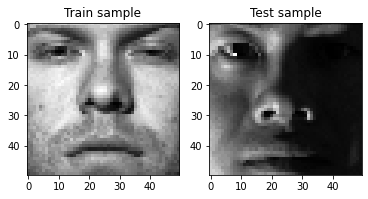

In [2]:
# (b)
train_labels, train_data, test_labels, test_data = [], [], [], []

for line in open('./faces/train.txt'):
    im = imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

for line in open('./faces/test.txt'):
    im = imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print("Train dataset shape: ", train_data.shape, train_labels.shape)
print("Test dataset shape: ", test_data.shape, test_labels.shape)

plt.subplot(1, 2, 1)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Train sample')
plt.subplot(1, 2, 2)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Test sample')
plt.show()

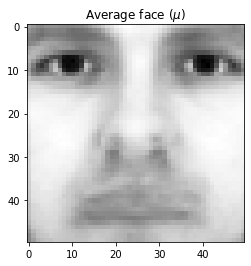

In [3]:
# (c) Average Face
mu = train_data[0]
for i in range(0,2500):
    mu[i] = np.mean(train_data[:,i])
plt.imshow(mu.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average face ($\mu$)')
plt.show()

Text(0.5, 1.0, 'Test sample ($\\mu$)')

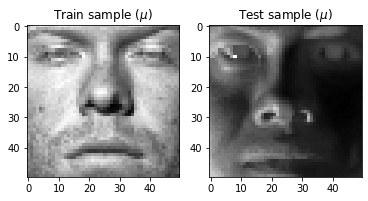

In [4]:
# (d) Mean Subtraction
train_sub = train_data.copy()
test_sub = test_data.copy()
for i in range(0,540):
    train_sub[i] -= mu
for i in range(0,100):
    test_sub[i] -= mu    
# print("Training face after mean substraction.")   
plt.subplot(1, 2, 1) 
plt.imshow(train_sub[10].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample ($\mu$)")
plt.subplot(1, 2, 2) 
plt.imshow(test_sub[10].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample ($\mu$)")

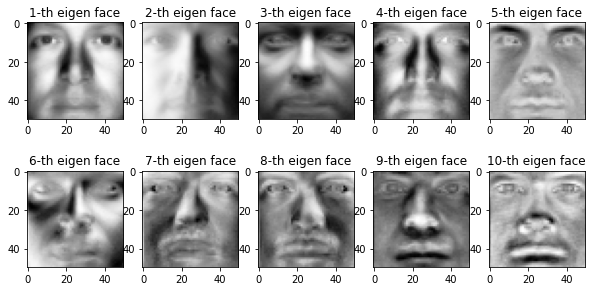

In [5]:
# (e) Eigenface
plt.figure(figsize=(10, 5))
U, s, V = np.linalg.svd(train_sub)
for i in range(10): 
    plt.subplot(2, 5, i + 1)
    plt.imshow(V[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.title('%d-th eigen face' % (i+1))
plt.tight_layout
plt.show()

In [6]:
# (f) Eigenface Feature
def eigenface_feature(V, train, test, r): 
    F = np.dot(train, V[:r,:].T)
    F_test = np.dot(test, V[:r,:].T)
    return (F, F_test)

In [7]:
# (g) Face Recognition w/ r = 10
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

accu = []
F_r10, F_test_r10 = eigenface_feature(V, train_sub, test_sub, 10)
ovr_r10 = OneVsRestClassifier(LogisticRegression())
ovr_r10.fit(F_r10, train_labels)
accu.append(ovr_r10.score(F_test_r10, test_labels))

print(accu)

[0.83]


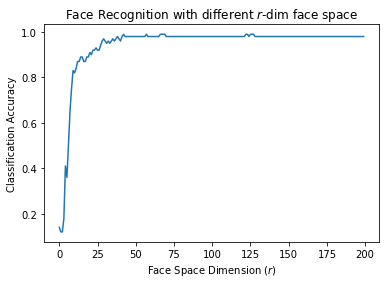

In [8]:
# (g) Face Recognition
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

accuracy = []
for r in range(1, 201):
    F, F_test = eigenface_feature(V, train_sub, test_sub, r)
    ovr = OneVsRestClassifier(LogisticRegression())
    ovr.fit(F, train_labels)
    accuracy.append(ovr.score(F_test, test_labels))

plt.figure(figsize=(6, 4))
plt.plot(accuracy)
plt.xlabel("Face Space Dimension ($r$)")
plt.ylabel("Classification Accuracy")
plt.title("Face Recognition with different $r$-dim face space")
plt.show()